## Basic Modeling

We will use this notebook to run narrow testing of a handful of models. We won't make use of the full array of max_features and two types of vectorizers. Instead we're just getting a handle on the basics of performance and such.

In [34]:
# 1. Imports
import joblib
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [35]:
# 2. Load data from ../data_preparation/
data_path = Path("../data_preparation")

X_train = joblib.load(data_path / "X_train_tfidf_10000.joblib")
X_test = joblib.load(data_path / "X_test_tfidf_10000.joblib")
y_train = joblib.load(data_path / "y_train.joblib")
y_test = joblib.load(data_path / "y_test.joblib")
label_encoder = joblib.load(data_path / "label_encoder.joblib")


In [36]:
# 3. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
}



🔹 Logistic Regression
Accuracy: 0.8264
Classification Report:
                    precision    recall  f1-score   support

Art and Literature       0.79      0.83      0.81      1150
     Entertainment       0.85      0.88      0.86      1153
         Geography       0.77      0.78      0.78       891
           History       0.80      0.79      0.79       962
         Lifestyle       0.77      0.69      0.73       714
             Music       0.85      0.83      0.84       743
Science and Nature       0.84      0.87      0.85       837
             Sport       0.93      0.91      0.92       889

          accuracy                           0.83      7339
         macro avg       0.83      0.82      0.82      7339
      weighted avg       0.83      0.83      0.83      7339



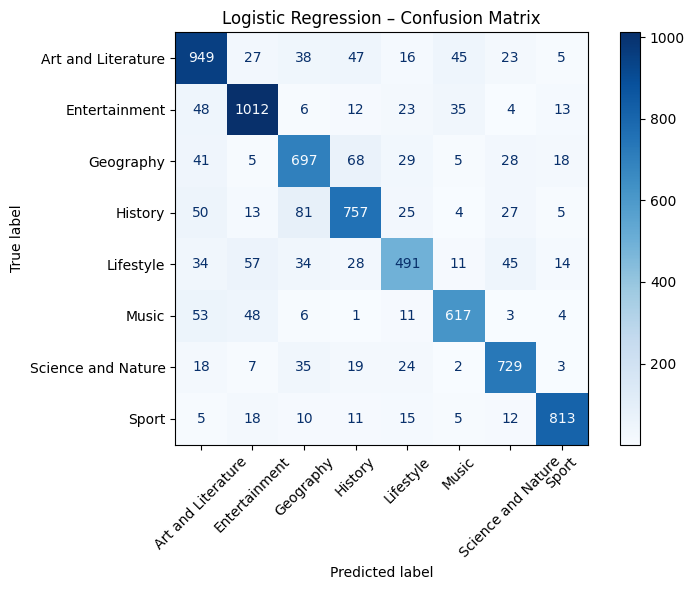


🔹 Random Forest
Accuracy: 0.7703
Classification Report:
                    precision    recall  f1-score   support

Art and Literature       0.78      0.75      0.76      1150
     Entertainment       0.82      0.86      0.84      1153
         Geography       0.68      0.76      0.72       891
           History       0.74      0.66      0.70       962
         Lifestyle       0.71      0.54      0.61       714
             Music       0.81      0.83      0.82       743
Science and Nature       0.72      0.82      0.77       837
             Sport       0.87      0.90      0.89       889

          accuracy                           0.77      7339
         macro avg       0.77      0.76      0.76      7339
      weighted avg       0.77      0.77      0.77      7339



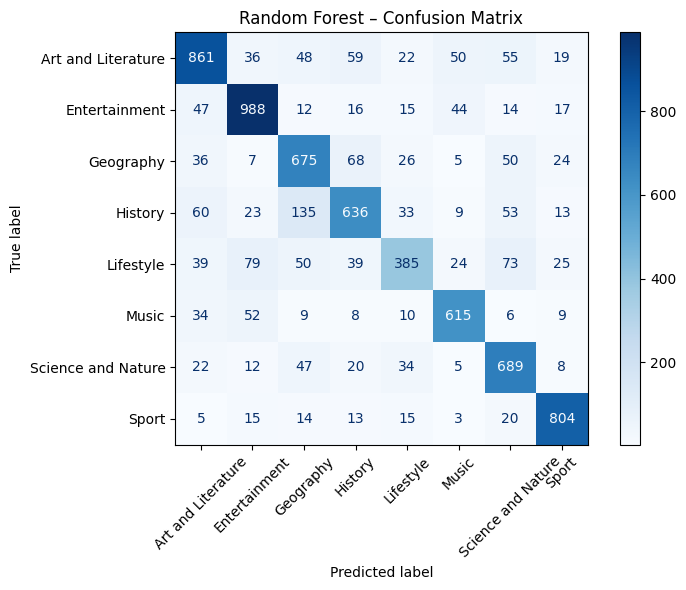


🔹 Naive Bayes
Accuracy: 0.8135
Classification Report:
                    precision    recall  f1-score   support

Art and Literature       0.77      0.82      0.80      1150
     Entertainment       0.79      0.90      0.84      1153
         Geography       0.76      0.78      0.77       891
           History       0.81      0.78      0.79       962
         Lifestyle       0.82      0.62      0.70       714
             Music       0.87      0.77      0.82       743
Science and Nature       0.82      0.87      0.84       837
             Sport       0.93      0.91      0.92       889

          accuracy                           0.81      7339
         macro avg       0.82      0.81      0.81      7339
      weighted avg       0.82      0.81      0.81      7339



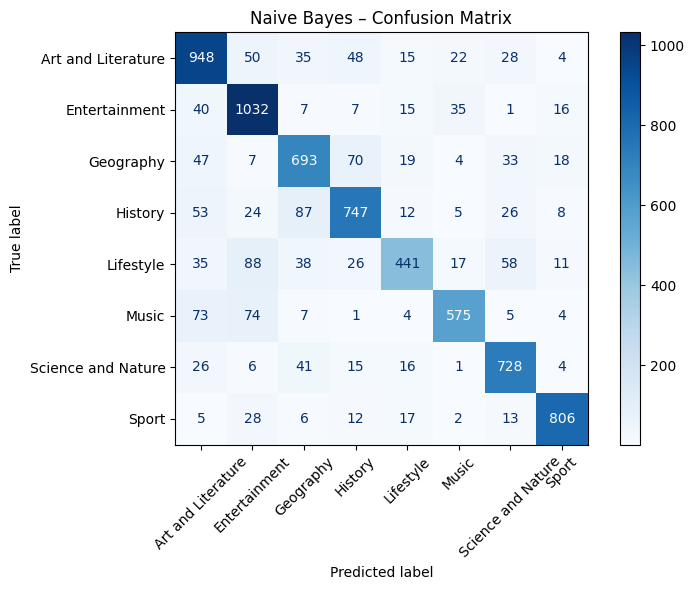

In [37]:
# 4. Train and evaluate
for name, model in models.items():
    print(f"\n🔹 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=label_encoder.classes_
    )
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(
        cmap='Blues',
        ax=ax,
        xticks_rotation=45,
        values_format='d'    # show as integers
        )
    ax.set_title(f"{name} – Confusion Matrix")
    plt.tight_layout()
    plt.show()